<a href="https://colab.research.google.com/github/KESHAVBERG/relearningpandas/blob/master/visualisation17_8_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##**Tabulation**

In [ ]:
import json 
import urllib.request

In [ ]:
url = 'https://api.covid19india.org/states_daily.json'

In [ ]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7f4673b28358>)

In [ ]:
covid  = pd.read_json('data.json')

In [ ]:
covid

states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
511  {'an': '61', 'ap': '8772', 'ar': '63', 'as': '...
512  {'an': '1', 'ap': '85', 'ar': '0', 'as': '10',...
513  {'an': '28', 'ap': '10368', 'ar': '100', 'as':...
514  {'an': '67', 'ap': '9350', 'ar': '94', 'as': '...
515  {'an': '0', 'ap': '84', 'ar': '0', 'as': '9', ...

[516 rows x 1 columns]

In [ ]:
with open('data.json') as f:
  data = json.load(f)

In [ ]:
data

{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl':

In [ ]:
data = data['states_daily']

In [ ]:
covid = pd.json_normalize(data)

In [ ]:
covid

an     ap   ar    as    br   ch  ...   tr     tt un    up   ut    wb
0     0      1    0     0     0    0  ...    0     81  0    12    0     0
1     0      0    0     0     0    0  ...    0      9  0     4    0     0
2     0      0    0     0     0    0  ...    0      2  0     0    0     0
3     0      0    0     0     0    0  ...    0     27  0     1    0     0
4     0      0    0     0     0    0  ...    0      4  0     0    0     0
..   ..    ...  ...   ...   ...  ...  ...  ...    ... ..   ...  ...   ...
511  61   8772   63  1531  2267  135  ...  201  64435  0  4597  604  3318
512   1     85    0    10     6    4  ...    5    816  0    63   12    52
513  28  10368  100  2684  1928  204  ...  509  78168  0  5343  571  2943
514  67   9350   94  1434  2029  120  ...  221  62145  0  4537  404  3346
515   0     84    0     9    15    1  ...   10   1027  0    56   11    55

[516 rows x 41 columns]

In [ ]:
df = covid

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df = df[df.status == 'Confirmed']

In [ ]:
df.drop('status' , axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df

an     ap   ar    as    br   ch  ...   tr     tt un    up   ut    wb
date                                         ...                                
2020-03-14   0      1    0     0     0    0  ...    0     81  0    12    0     0
2020-03-15   0      0    0     0     0    0  ...    0     27  0     1    0     0
2020-03-16   0      0    0     0     0    0  ...    0     15  0     0    1     0
2020-03-17   0      0    0     0     0    0  ...    0     11  0     2    0     1
2020-03-18   0      0    0     0     0    0  ...    0     37  0     2    1     0
...         ..    ...  ...   ...   ...  ...  ...  ...    ... ..   ...  ...   ...
2020-08-28  32  10526  112  2560  1998  160  ...  509  76657  0  5405  588  2982
2020-08-29  31  10548  132  2427  2087  261  ...  443  78479  0  5633  706  3012
2020-08-30  23  10603  157  1980  2078  170  ...  447  79461  0  6175  664  3019
2020-08-31  28  10004   78  3266  1324  191  ...  321  68766  0  4782  592  2993
2020-09-01  28  10368  100  2684  1928  204  ...  509  78168  0  5343  571  2943

[172 rows x 39 columns]

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2020-03-14 to 2020-09-01
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      172 non-null    int64
 1   ap      172 non-null    int64
 2   ar      172 non-null    int64
 3   as      172 non-null    int64
 4   br      172 non-null    int64
 5   ch      172 non-null    int64
 6   ct      172 non-null    int64
 7   dd      172 non-null    int64
 8   dl      172 non-null    int64
 9   dn      172 non-null    int64
 10  ga      172 non-null    int64
 11  gj      172 non-null    int64
 12  hp      172 non-null    int64
 13  hr      172 non-null    int64
 14  jh      172 non-null    int64
 15  jk      172 non-null    int64
 16  ka      172 non-null    int64
 17  kl      172 non-null    int64
 18  la      172 non-null    int64
 19  ld      172 non-null    int64
 20  mh      172 non-null    int64
 21  ml      172 non-null    int64
 22  mn      172 non-null    int64
 

## styling 

In [ ]:
tail = df.tail(7)

In [ ]:
def resColorToNegative(x):
  color = 'red' if x<0 else 'white'
  return 'color:'+color

In [ ]:
tail.style.applymap(resColorToNegative)

In [ ]:
tail.style.highlight_max(color='red')


In [ ]:
tail.style.highlight_min(color='green')

In [ ]:
tail.drop(['dd','ld','un'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
tail.style.highlight_max(color='red')


In [ ]:
tail.style.highlight_max(color='red').highlight_min(color ='green' )


In [ ]:
def bold_max_value(x):
  max = (x == x.max())
  return ['font-weight:bold'if y else '' for y in max]

In [ ]:
tail.style.apply(bold_max_value).highlight_max(color = 'black').highlight_max(color = 'red',axis = 1)

In [ ]:
tail.style.background_gradient(cmap='Reds')

In [ ]:
tail.style.background_gradient(cmap='Reds',axis=1)

In [ ]:
tail.style.background_gradient(cmap='Reds' , axis = 1)

In [ ]:
tail[['tn','mh']].style.bar()

In [ ]:
tail[['tn','mh']].style.bar(subset=['tn'],color='yellow').bar(subset=['mh'],color='green')

## using plots

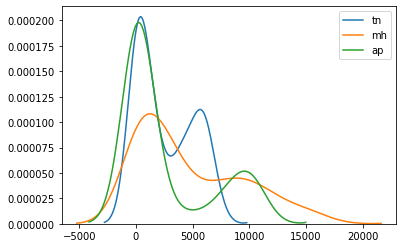

In [ ]:
sns.kdeplot(df.tn)
sns.kdeplot(df.mh)
sns.kdeplot(df.ap)

#distribution

In [ ]:
sns.set(color_codes=True,style='whitegrid')

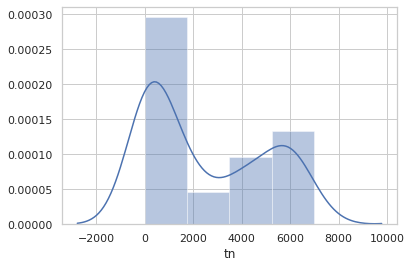

In [ ]:
sns.distplot(df['tn'])

In [ ]:
x = np.random.randn(1000)
y = np.random.randn(1500)

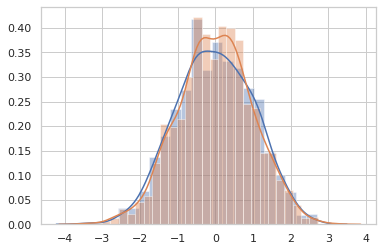

In [ ]:
sns.distplot(x)
sns.distplot(y)

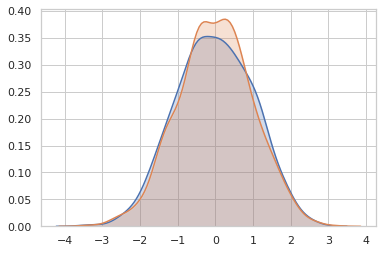

In [ ]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True)

In [ ]:
d  = sns.load_dataset('diamonds')

In [ ]:
d

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

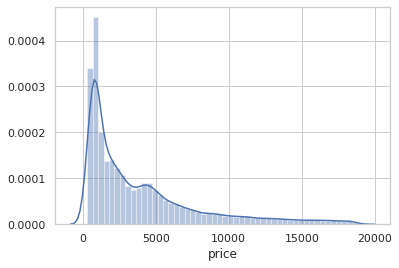

In [ ]:
sns.distplot(d.price)
# sns.distplot(d.carat)


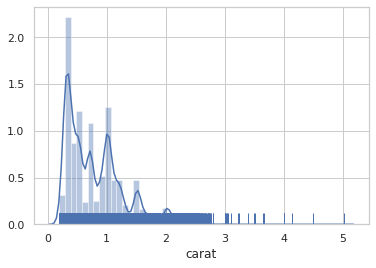

In [ ]:
sns.distplot(d.carat,rug=True)

## box plot

In [ ]:
x = np.random.randn(1000)
y = np.random.randn(1500)

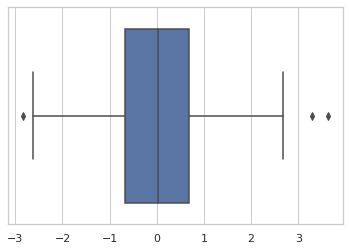

In [ ]:
sns.boxplot(x)

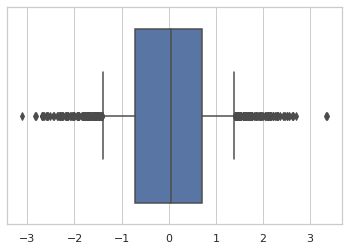

In [ ]:
sns.boxplot(y,whis=0.5)


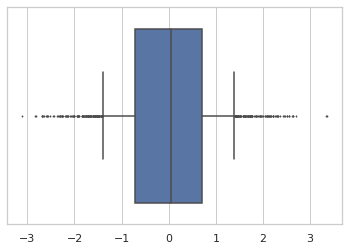

In [ ]:
sns.boxplot(y,whis=0.5,fliersize=1)

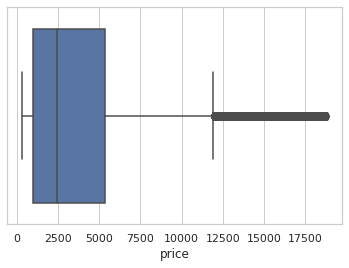

In [ ]:
sns.boxplot(d.price,)

##box Plot

In [ ]:
d

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [ ]:
c = d.groupby('cut')['cut'].count()

In [ ]:
c

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

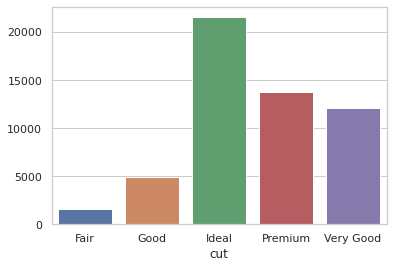

In [ ]:
sns.barplot(x=c.index , y = c.values)

In [ ]:
c = d.groupby('clarity')['clarity'].count()

In [ ]:
c

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: clarity, dtype: int64

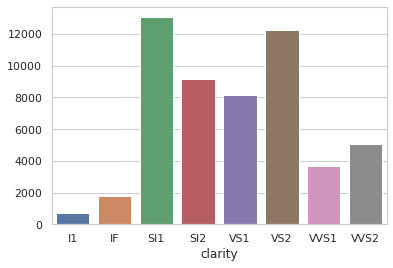

In [ ]:
sns.barplot(x=c.index , y = c.values)

In [ ]:
c = d.groupby('color')['color'].count()

In [ ]:
c

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: color, dtype: int64

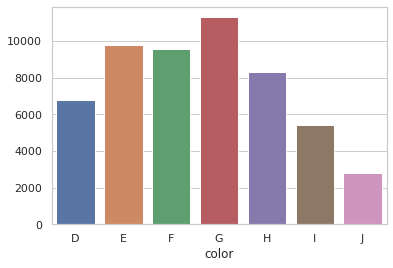

In [ ]:
sns.barplot(x = c.index , y = c.values)

## joint distribution

### join plot

In [ ]:
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)

In [ ]:
df = pd.DataFrame({'x':x , 'y':y})

In [ ]:
df

x         y
0    0.956855 -0.563274
1    0.598352 -1.735737
2    0.258844  0.625938
3    1.807075  2.583999
4   -0.132079 -1.191920
..        ...       ...
995  0.000094 -1.150543
996  1.032265  0.124526
997 -0.388613  2.242775
998  0.489101  1.162076
999  1.995667  0.885519

[1000 rows x 2 columns]

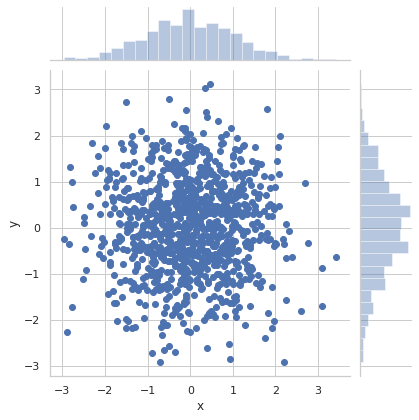

In [ ]:
sns.jointplot('x' ,'y' , data=df)

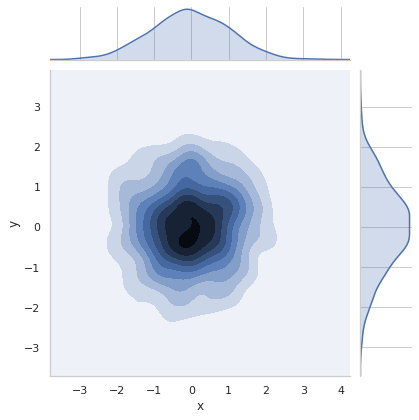

In [ ]:
sns.jointplot('x' ,'y' , data=df,kind='kde')

In [ ]:
x = np.random.normal(size = 1000)
y =3*x + np.random.normal(size=1000)/5


In [ ]:
df = pd.DataFrame({'x':x,'y':y})

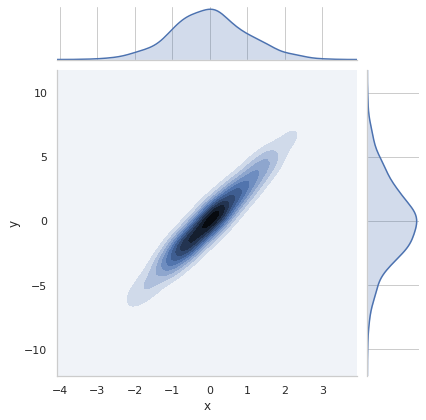

In [ ]:
sns.jointplot('x' ,'y' , data=df,kind='kde')

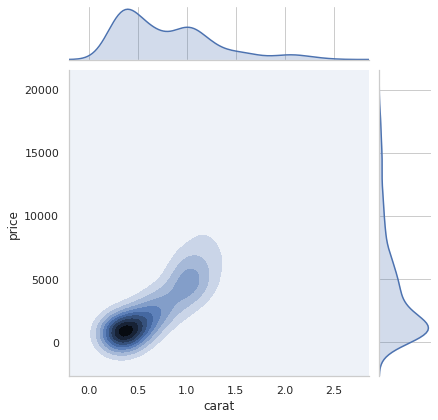

In [ ]:
sns.jointplot('carat' ,'price' , data=d.sample(500),kind='kde')

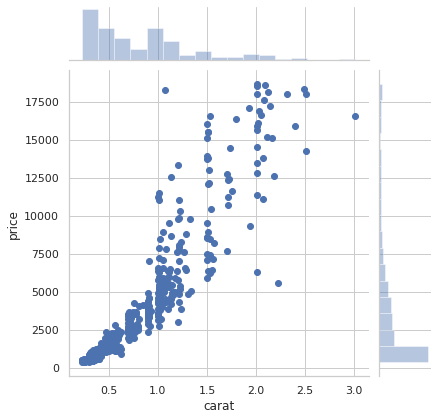

In [ ]:
sns.jointplot('carat' ,'price' , data=d.sample(500))

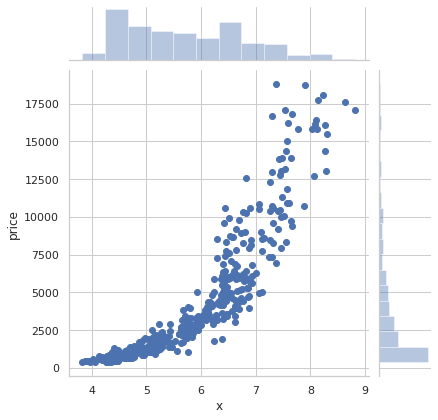

In [ ]:
sns.jointplot('x' ,'price' , data=d.sample(500))

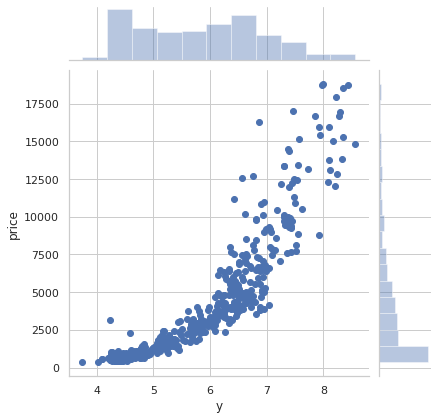

In [ ]:
sns.jointplot('y' ,'price' , data=d.sample(500))

### swarm plot/


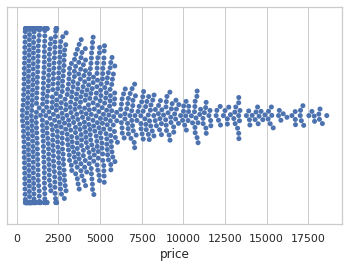

In [ ]:
sns.swarmplot(d.sample(1000).price)

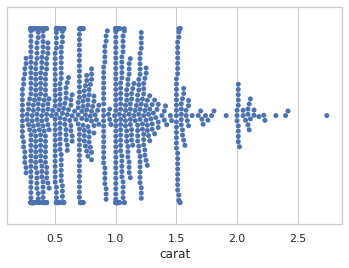

In [ ]:
sns.swarmplot(d.sample(1000).carat)

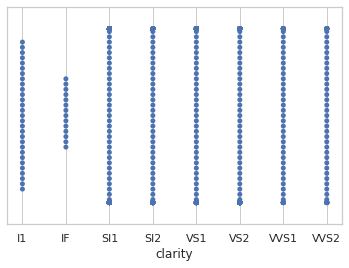

In [ ]:
sns.swarmplot(d.head(1000).clarity)

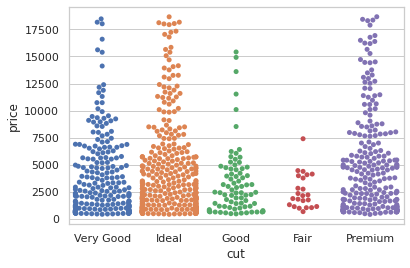

In [ ]:
sns.swarmplot(x='cut' , y='price' , data=d.sample(1000))

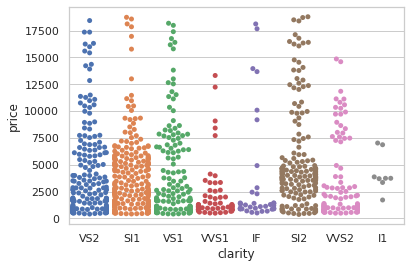

In [ ]:
sns.swarmplot(x='clarity' , y='price' , data=d.sample(1000))

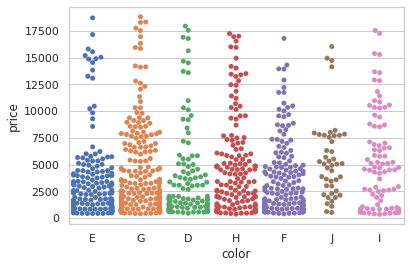

In [ ]:
sns.swarmplot(x='color' , y='price' , data=d.sample(1000))

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
p.head(20)

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0   Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1   Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2   Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3   Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4   Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE
5   Adelie  Torgersen            39.3  ...              190.0       3650.0    MALE
6   Adelie  Torgersen            38.9  ...              181.0       3625.0  FEMALE
7   Adelie  Torgersen            39.2  ...              195.0       4675.0    MALE
8   Adelie  Torgersen            34.1  ...              193.0       3475.0     NaN
9   Adelie  Torgersen            42.0  ...              190.0       4250.0     NaN
10  Adelie  Torgersen            37.8  ...              186.0       3300.0     NaN
11  Adelie  Torgersen            37.8  ...              180.0       3700.0     NaN
12  Adelie  Torgersen            41.1  ...              182.0       3200.0  FEMALE
13  Adelie  Torgersen            38.6  ...              191.0       3800.0    MALE
14  Adelie  Torgersen            34.6  ...              198.0       4400.0    MALE
15  Adelie  Torgersen            36.6  ...              185.0       3700.0  FEMALE
16  Adelie  Torgersen            38.7  ...              195.0       3450.0  FEMALE
17  Adelie  Torgersen            42.5  ...              197.0       4500.0    MALE
18  Adelie  Torgersen            34.4  ...              184.0       3325.0  FEMALE
19  Adelie  Torgersen            46.0  ...              194.0       4200.0    MALE

[20 rows x 7 columns]

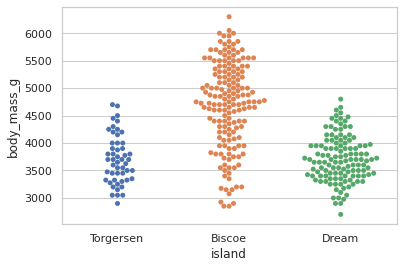

In [ ]:
sns.swarmplot(x='island' , y ='body_mass_g' , data=p )

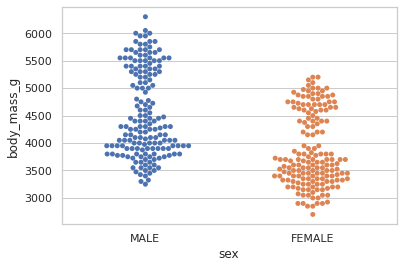

In [ ]:
sns.swarmplot(x='sex' , y ='body_mass_g' , data=p )

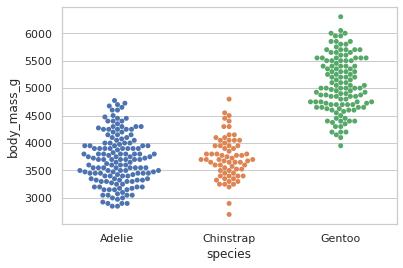

In [ ]:
sns.swarmplot(x='species' , y ='body_mass_g' , data=p )

### viloin plot

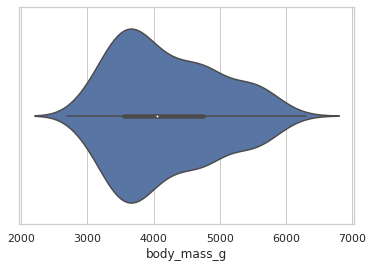

In [ ]:
sns.violinplot(x = p.body_mass_g)

white dot median.
dark line interquartile range.
</br>

interquartile range -> Measures the variablity of data by diving it into quartiles

[(2000.0, 7000.0)]

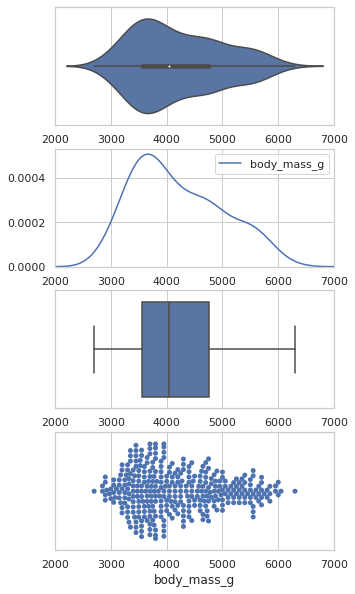

In [ ]:
fig , ax = plt.subplots(nrows=4)
fig.set_size_inches(5,10)
sns.violinplot(x = p.body_mass_g , ax=ax[0]).set(xlim=(2000,7000))
sns.kdeplot(p.body_mass_g , ax = ax[1]).set(xlim=(2000,7000))
sns.boxplot(p.body_mass_g , ax=ax[2]).set(xlim=(2000,7000))
sns.swarmplot(x = 'body_mass_g' , data=p).set(xlim=(2000,7000))

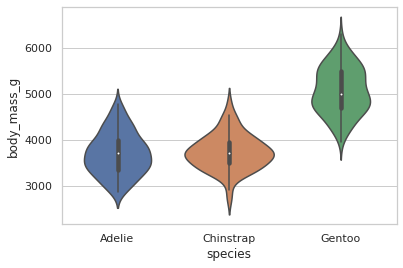

In [ ]:
sns.violinplot(x='species' , y = 'body_mass_g' , data=p)

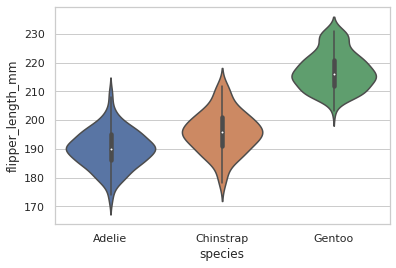

In [ ]:
 sns.violinplot(x='species' , y = 'flipper_length_mm' , data=p)

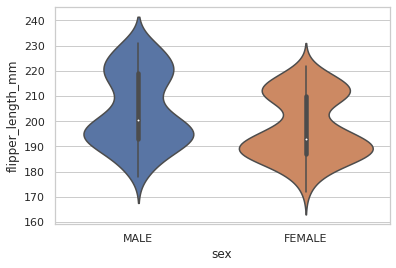

In [ ]:
 sns.violinplot(x='sex' , y = 'flipper_length_mm' , data=p)

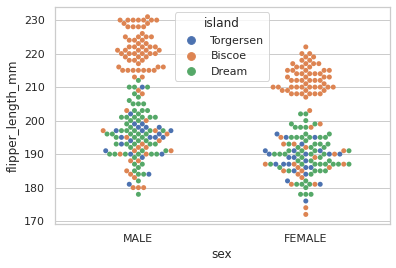

In [ ]:
 sns.swarmplot(x='sex' , y = 'flipper_length_mm',hue='island' , data=p)

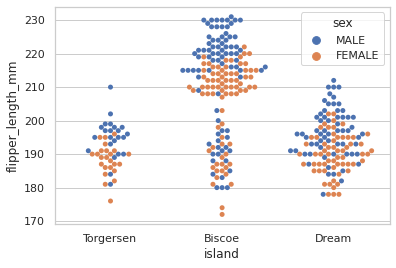

In [ ]:
 sns.swarmplot(x='island' , y = 'flipper_length_mm',hue='sex' , data=p)

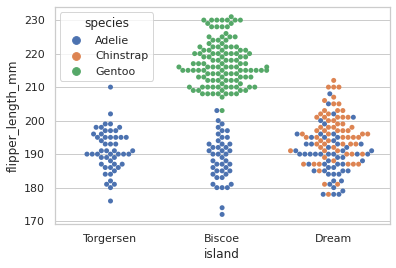

In [ ]:
 sns.swarmplot(x='island' , y = 'flipper_length_mm',hue='species' , data=p)

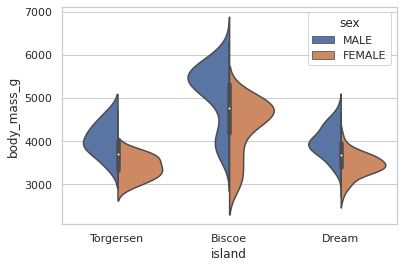

In [ ]:
sns.violinplot(x='island' , y='body_mass_g' ,hue='sex',split=True, data=p)

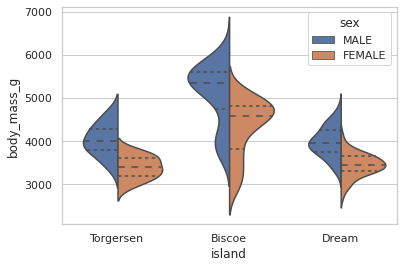

In [ ]:
sns.violinplot(x='island' , y='body_mass_g' ,inner='quartitle',hue='sex',split=True, data=p)

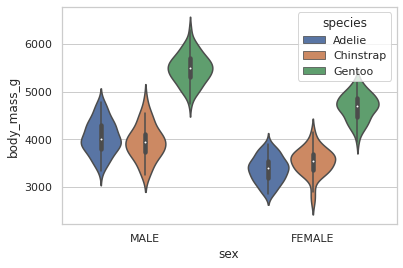

In [ ]:
sns.violinplot(x='sex' , y='body_mass_g'  ,hue='species', data=p)

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x=='Gentoo' else 'Adelie | chinstrap')

In [ ]:
p

species     island  bill_length_mm  ...  body_mass_g     sex      binary_species
0    Adelie  Torgersen            39.1  ...       3750.0    MALE  Adelie | chinstrap
1    Adelie  Torgersen            39.5  ...       3800.0  FEMALE  Adelie | chinstrap
2    Adelie  Torgersen            40.3  ...       3250.0  FEMALE  Adelie | chinstrap
3    Adelie  Torgersen             NaN  ...          NaN     NaN  Adelie | chinstrap
4    Adelie  Torgersen            36.7  ...       3450.0  FEMALE  Adelie | chinstrap
..      ...        ...             ...  ...          ...     ...                 ...
339  Gentoo     Biscoe             NaN  ...          NaN     NaN              Gentoo
340  Gentoo     Biscoe            46.8  ...       4850.0  FEMALE              Gentoo
341  Gentoo     Biscoe            50.4  ...       5750.0    MALE              Gentoo
342  Gentoo     Biscoe            45.2  ...       5200.0  FEMALE              Gentoo
343  Gentoo     Biscoe            49.9  ...       5400.0    MALE              Gentoo

[344 rows x 8 columns]

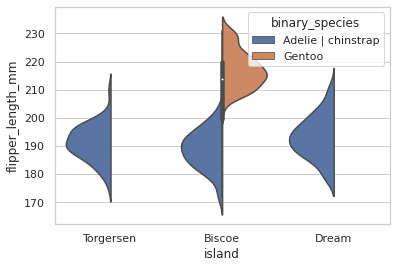

In [ ]:
sns.violinplot(x='island',y='flipper_length_mm' ,split=True, hue='binary_species' , data=p)

### Faceted plotting

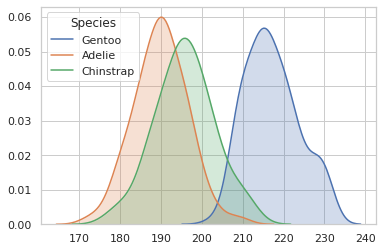

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm , shade=True)
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True)
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True)
plt.legend(title='Species'  ,labels=['Gentoo','Adelie' , 'Chinstrap'])

In [ ]:
p['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

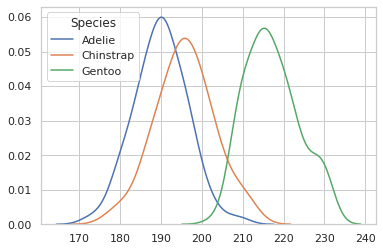

In [ ]:
column_name = 'species'
nrows = (p[column_name].unique())
for v in p[column_name].unique():
  sns.kdeplot(p[p[column_name]==v].flipper_length_mm)
  plt.legend(title='Species'  ,labels=[nrows[0],nrows[1],nrows[2]])



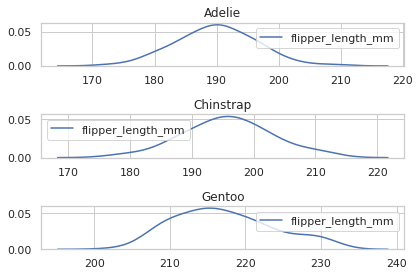

In [ ]:
column_name = 'species'
nrows_l = len(p[column_name].unique())
fig,ax  = plt.subplots(nrows=nrows_l)
i=0
for v in p[column_name].unique():
  sns.kdeplot(p[p[column_name]==v].flipper_length_mm , ax = ax[i]).set_title(v)
  # plt.legend(title='Species'  ,labels=[nrows[0],nrows[1],nrows[2]])
  i+=1
plt.tight_layout()  


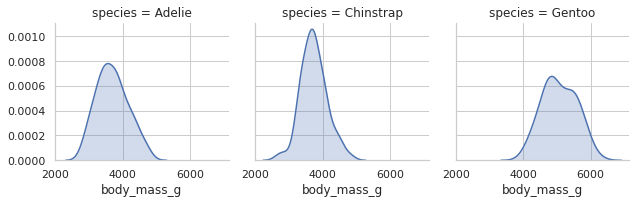

In [ ]:
g = sns.FacetGrid(p , col='species')
g.map(sns.kdeplot , 'body_mass_g',shade=True)

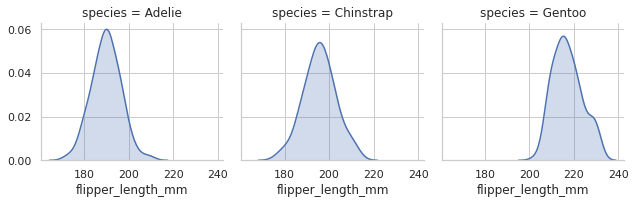

In [ ]:
g = sns.FacetGrid(p , col='species')
g.map(sns.kdeplot , 'flipper_length_mm',shade=True)

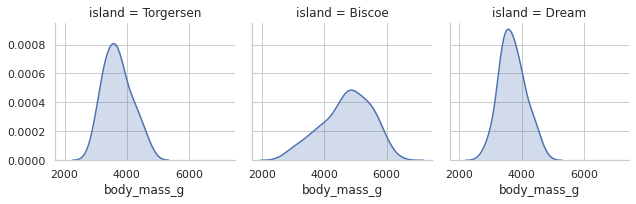

In [ ]:
g = sns.FacetGrid(p , col='island')
g.map(sns.kdeplot , 'body_mass_g',shade=True)

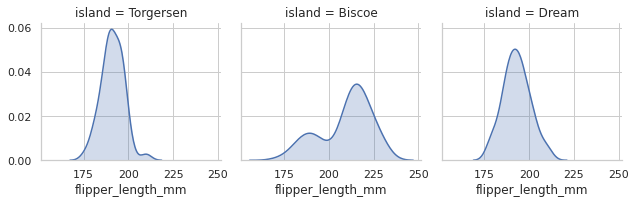

In [ ]:
g = sns.FacetGrid(p , col='island')
g.map(sns.kdeplot , 'flipper_length_mm',shade=True)

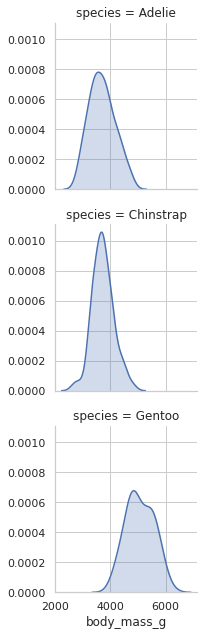

In [ ]:
g = sns.FacetGrid(p , row='species')
g.map(sns.kdeplot , 'body_mass_g',shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


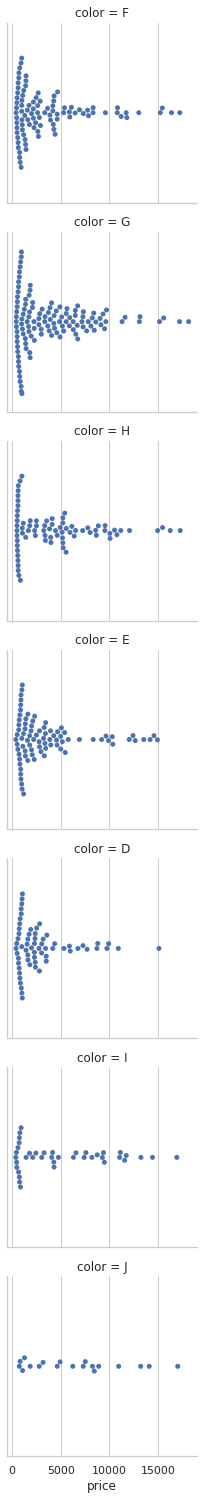

In [ ]:
g = sns.FacetGrid(d.sample(500), row='color')
g.map(sns.swarmplot , 'price')

## pair plot

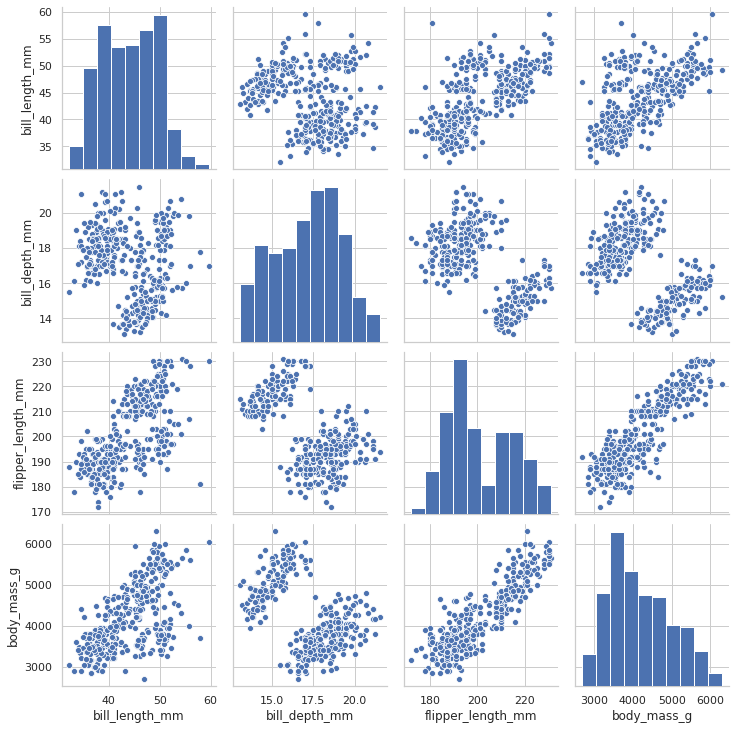

In [ ]:
sns.pairplot(p)

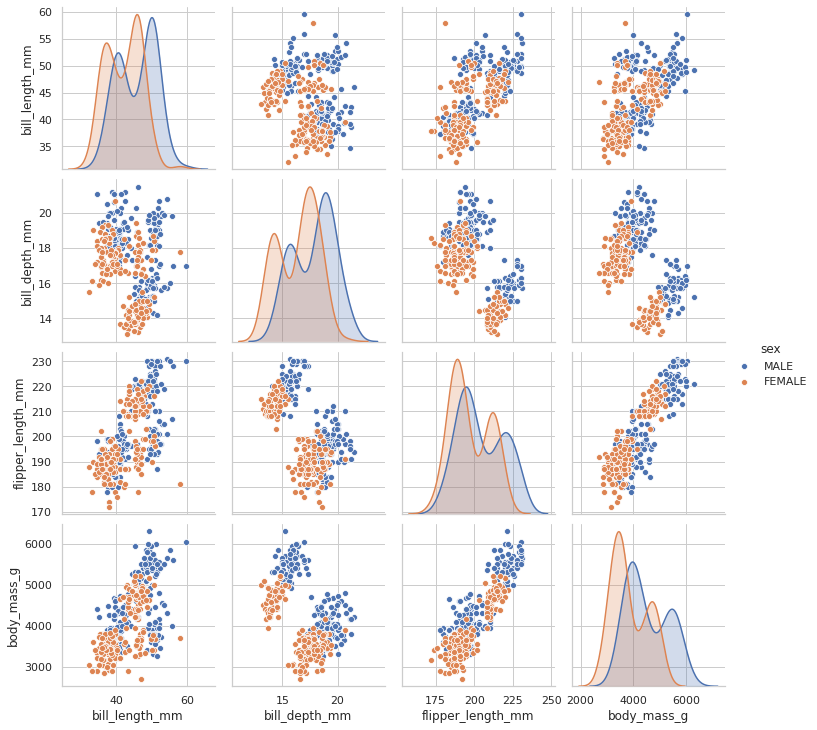

In [ ]:
sns.pairplot(p , hue='sex')


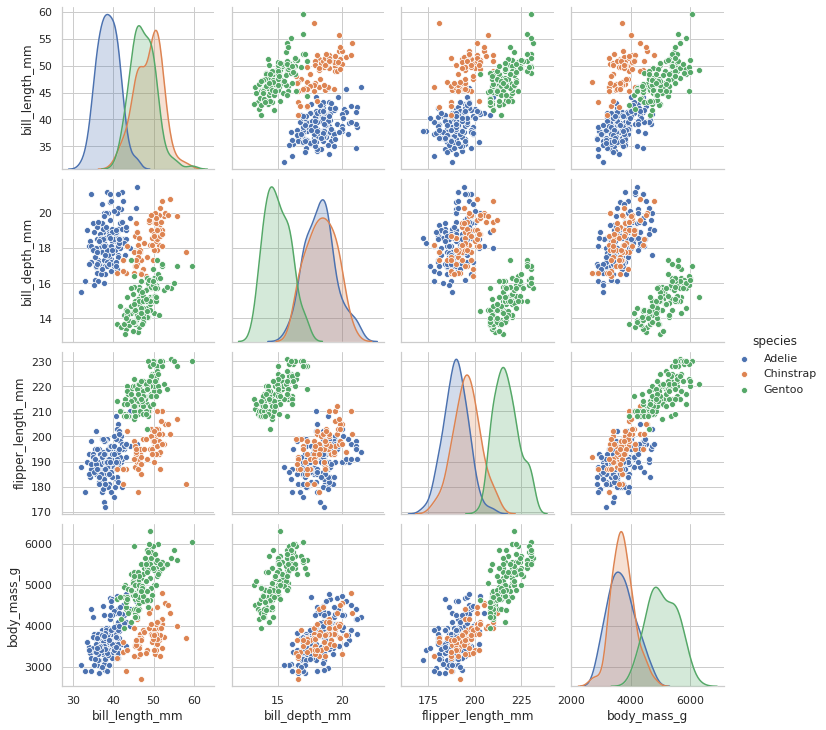

In [ ]:
sns.pairplot(p , hue='species')

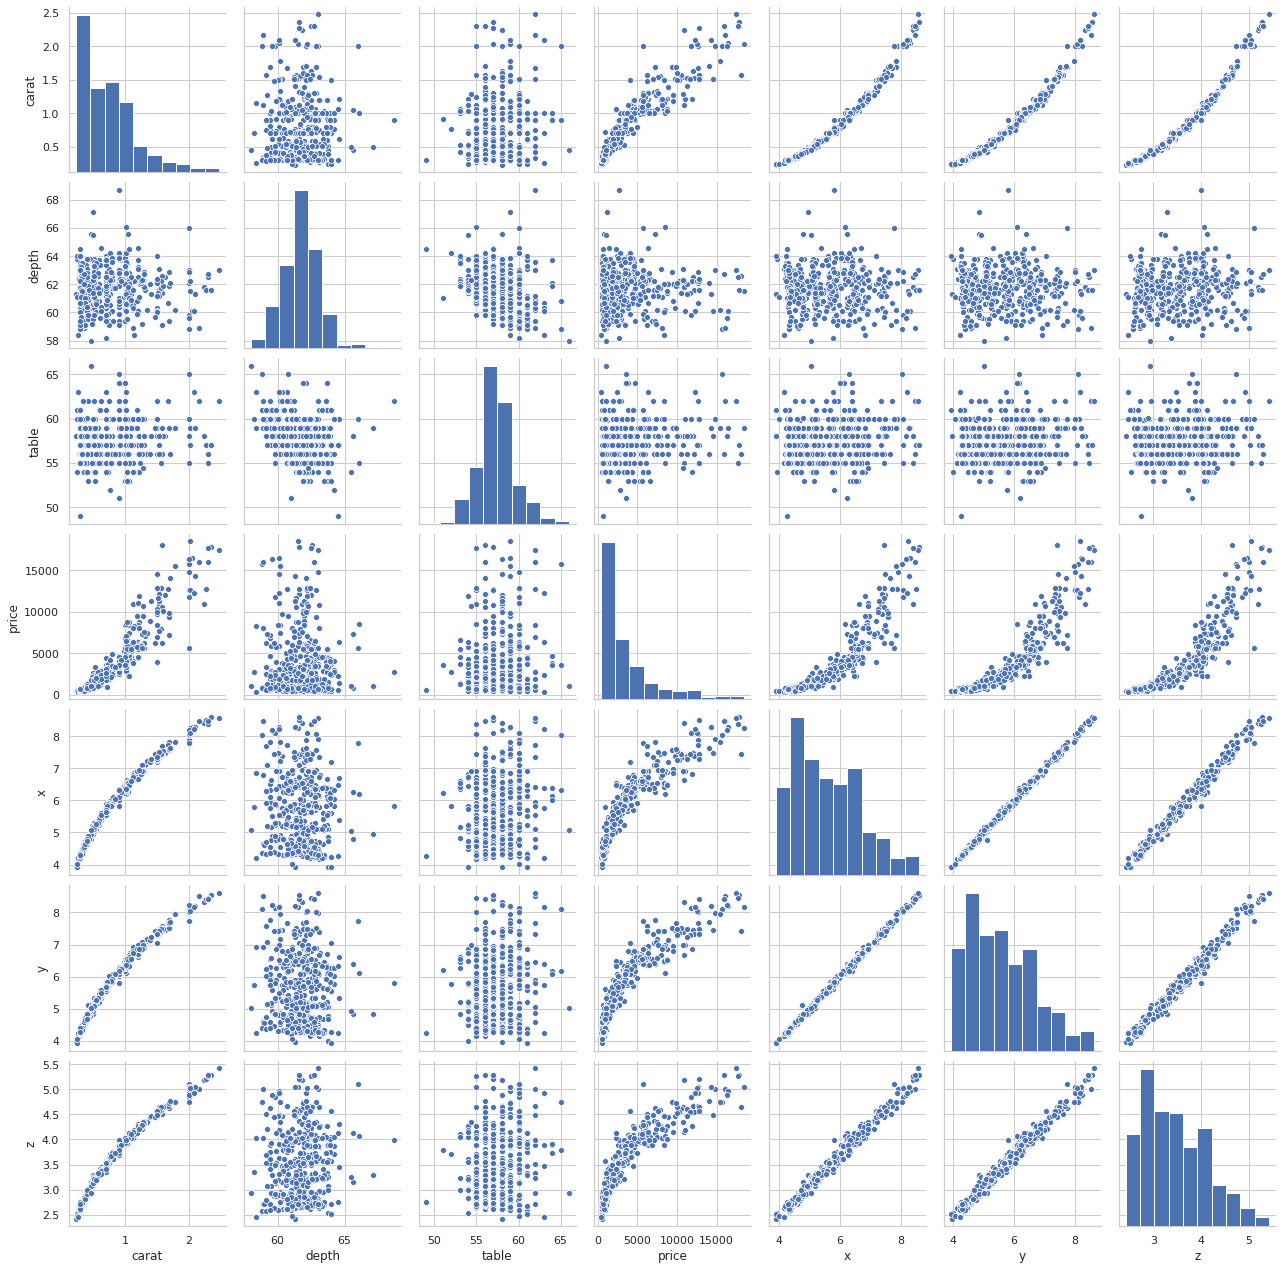

In [ ]:
sns.pairplot(d.sample(500))

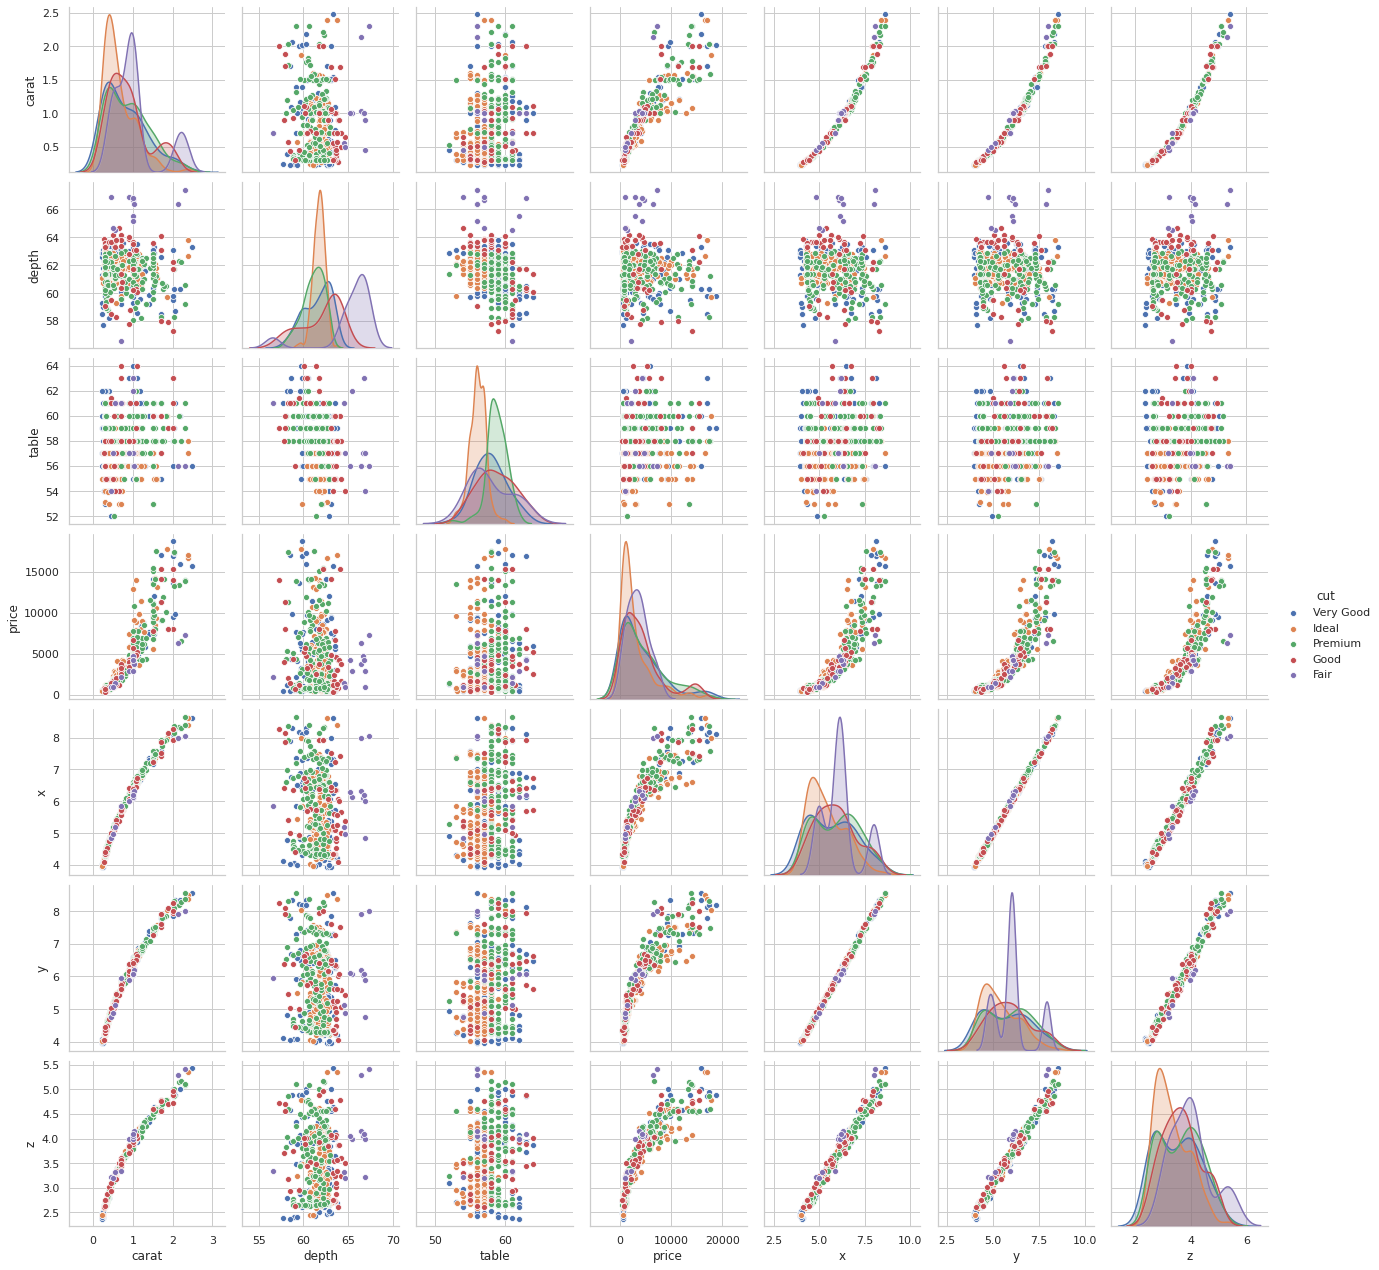

In [ ]:
sns.pairplot(d.sample(500) , hue='cut')

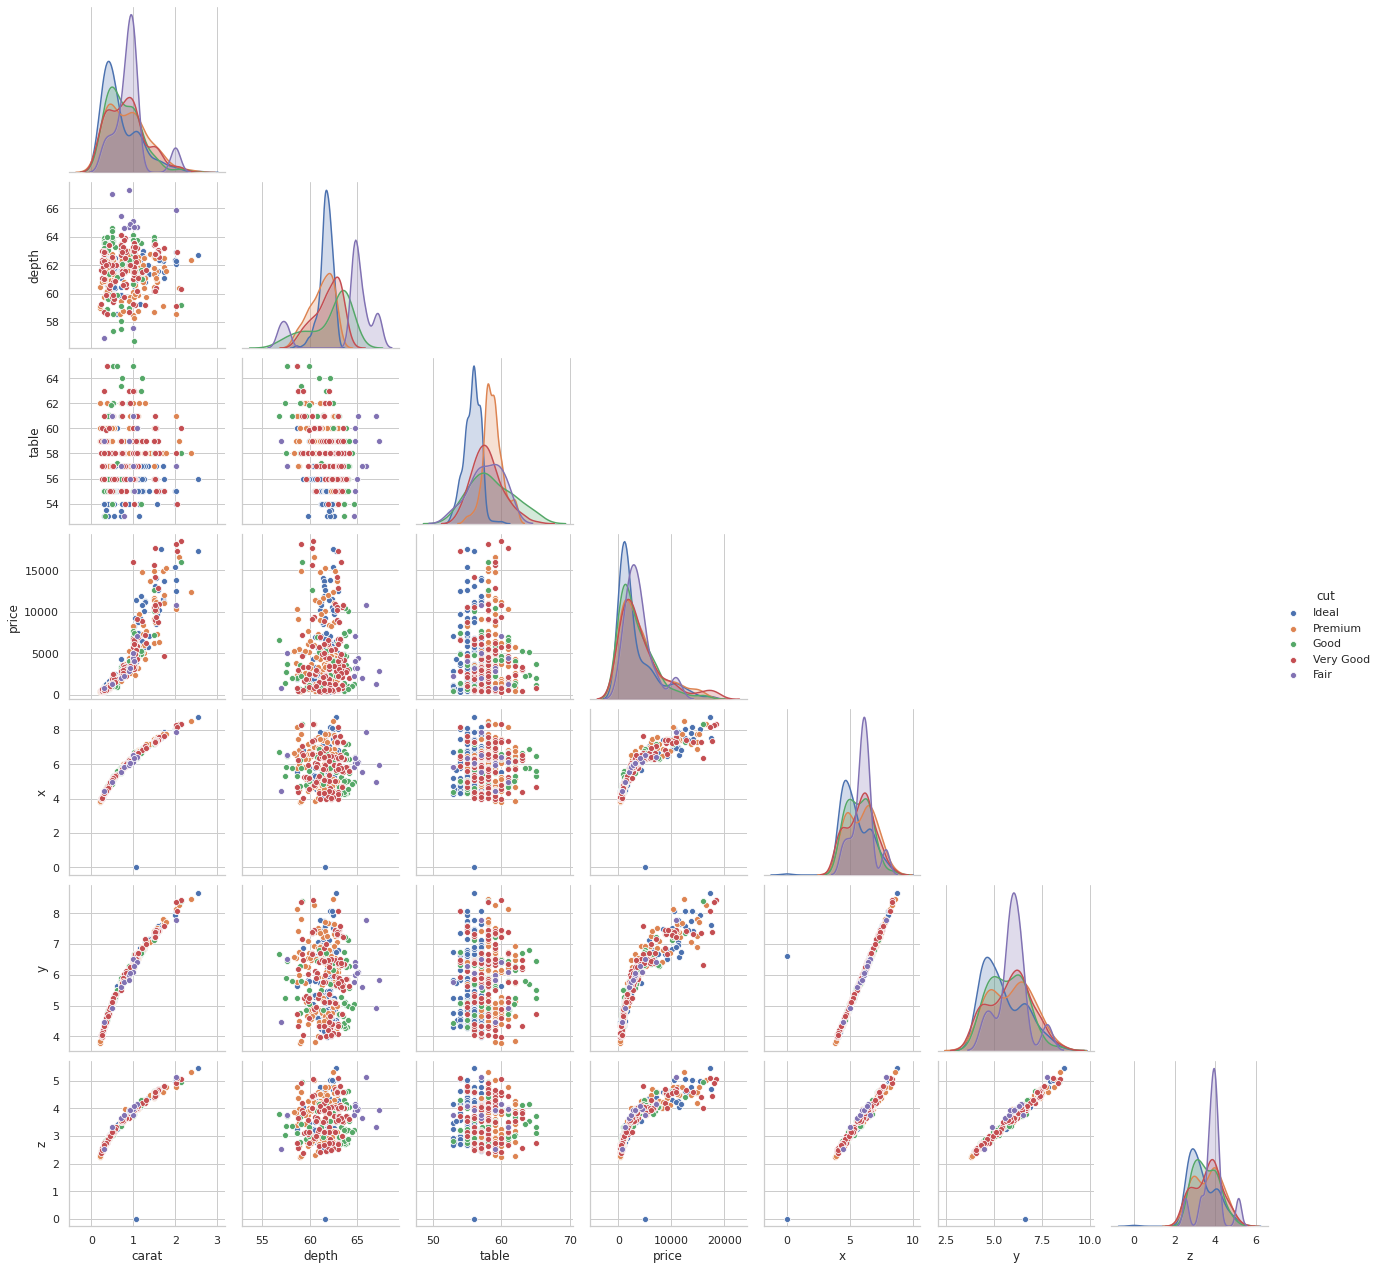

In [ ]:
sns.pairplot(d.sample(500) , hue='cut' , corner=True)

## boxen plot

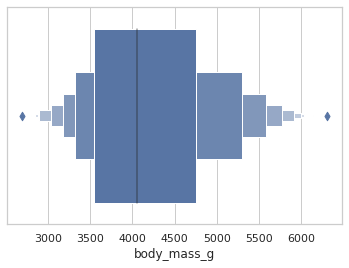

In [ ]:
sns.boxenplot(p.body_mass_g)

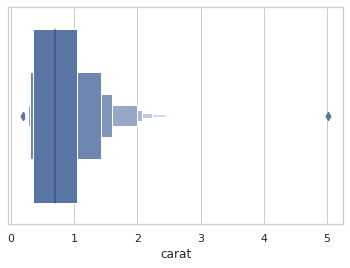

In [ ]:
sns.boxenplot(d.carat.sample(1000))

In [ ]:
p.head()

species     island  bill_length_mm  ...  body_mass_g     sex      binary_species
0  Adelie  Torgersen            39.1  ...       3750.0    MALE  Adelie | chinstrap
1  Adelie  Torgersen            39.5  ...       3800.0  FEMALE  Adelie | chinstrap
2  Adelie  Torgersen            40.3  ...       3250.0  FEMALE  Adelie | chinstrap
3  Adelie  Torgersen             NaN  ...          NaN     NaN  Adelie | chinstrap
4  Adelie  Torgersen            36.7  ...       3450.0  FEMALE  Adelie | chinstrap

[5 rows x 8 columns]

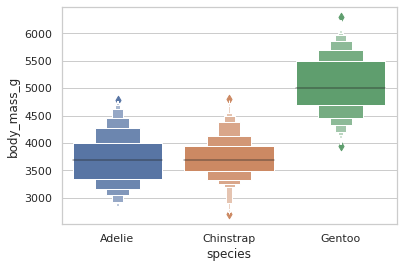

In [ ]:
sns.boxenplot(x='species' , y = 'body_mass_g' , data=p)

In [1]:
!https://github.com/KESHAVBERG/visualisation.git


/bin/bash: https://github.com/KESHAVBERG/visualisation.git: No such file or directory
